Homework #1: Inversion for Interseismic	Fault Slip Rates

Background: The	earth’s	crust deforms as strain	builds along active	faults	during	the interseismic period. The crustal	 deformation can be	measured using	GNSS, with stations placed across the fault. Estimates of the slip rate on the fault provide a first order constraint on the seismic hazard, as	the	risk of	strong	ground shaking scales with the interseismic	fault slip rate. The interseismic slip rate	on	the	fault, s, is related to the	fault-parallel	horizontal	surface	velocity, v, for a	vertical strike-slip	fault :

The	variable x	is	the	horizontal	position	along	an	axis	perpendicular	to	the	fault.		The	model	
assumes	that the	fault	is	embedded	in	an	elastic	half-space	with	fault	locking	depth	D.	
Since	the	crust	is	assumed	to	be	elastic,	the	law	of	superposition	can	be	used	to	calculate	
the	deformation	from	multiple	faults.	

This	results	in	one	equation	per	GNSS	station.	

Goal: Solve	for	the	optimal	set	of	fault	slip	rates	on 5	parallel	strike-slip	faults using	a	GNSS	
data	set (see	data	file).		The	location	of	each	fault	is	known	by	mapping	the	local	geology	
(xfault).		The	fault	locking	depth	for	each	fault	can	be	inferred	based	on	the	maximum	depth	
of	crustal	seismicity	(Table	1).

You	can	use	the	programming	language	of	your	choice	to	code	the	problem.	 Upload	your	
answers	to	Canvas	as	a	screen	shot	of	your	code	with	answers, or	packaged	as	a	pdf.		
Include	relevant	figures	to	help	visualize	your	results.	

Import packages:

In [139]:
import numpy as np
import math
from cmath import sqrt
import matplotlib.pyplot as plt
plt.style.use(['default'])
#plt.style.use(['science','ieee'])

(a) [1	pt]	Formulate	a	linear	problem	of	the	form d = Gm.

You	can	either	write	out	the	relevant	equations,	or	show the	code	to	calculate	the	coefficients	to	the	equations.

In [140]:
#d(10*1)(mm) = G(10*5)(yr) * m(5*1)(mm/yr)

(b) [1	pt]	Construct	data d and	model	m vectors.		(display	values;	specify	units)

In [141]:
#GNSS data set for the fault-parallel surface velocity
#x_position(km) initial  
x=np.array([5,20,25,70,105,185,200,208,220,290])

#Surface_velocity(mm/yr)
d=np.matrix([-26.8789, -27.1257, -27.4999, -14.907, -5.9737, 18.3194, 19.0408, 21.6918, 25.0392, 28.7211])

#uncertainty(mm/yr)
fit=np.matrix([1.5905, 0.8008, 1.1438, 2.6112, 0.8839, 0.7195, 2.0715, 1.358, 1.0329, 0.8648])

#x_fault (km)
xf=np.array([60,110,140,150,210])

#Depth (km)
D=np.array([10,10,5,15,12])

In [142]:
print(np.shape(x))
print(np.shape(xf))
print(np.shape(D))
pi = math.pi

(10,)
(5,)
(5,)


(c) [1	pt]	Construct	the	G matrix. (display	values;	specify	units)

V(xi,xf) = s/pi arctan ((xi-xf)/D)

In [143]:
G=np.zeros((len(x),len(xf)))
for i in range (len(x)):
    for j in range (len(xf)):
        G[i][j]= np.arctan((x[i]-xf[j])/D[j])/pi

In [144]:
G

array([[-0.44275085, -0.46977593, -0.48821613, -0.4671881 , -0.48138846],
       [-0.42202087, -0.46477671, -0.48674476, -0.46343364, -0.47992288],
       [-0.41141447, -0.46272313, -0.48616915, -0.46198459, -0.47938176],
       [ 0.25      , -0.42202087, -0.47730213, -0.44100192, -0.47278282],
       [ 0.43039551, -0.14758362, -0.45483276, -0.39758362, -0.46377888],
       [ 0.47458933,  0.45780754,  0.46477671,  0.37111894, -0.35754997],
       [ 0.47730213,  0.46477671,  0.47353532,  0.40722642, -0.22114206],
       [ 0.47852522,  0.46763143,  0.47663691,  0.41944352, -0.05256846],
       [ 0.48013148,  0.47114206,  0.48013148,  0.43280691,  0.22114206],
       [ 0.48616915,  0.48233428,  0.4893936 ,  0.46602498,  0.45260686]])

In [145]:
#This is the G matrix
print(np.shape(G))


(10, 5)


(d) [1	pt]	Is	this	an	underdetermined,	even-determined,	or	over-determined	inverse	
problem?	Justify	your	answer.

Overdeterminated because there are ,more measurements that variables

(e) [2	pts]	Calculate	the	generalized	inverse	G-g using	singular	value	decomposition. Be	
sure	to	justify	your	choice	of	threshold	for	the	singular	values.

In [146]:
u,s,vh = np.linalg.svd(G, full_matrices=False)
print(np.shape(u))
print(np.shape(s))
print(np.shape(vh))

(10, 5)
(5,)
(5, 5)


In [147]:
sm = np.matrix([[s[0],0,0,0,0],
                [0,s[1],0,0,0],
                [0,0,s[2],0,0],
                [0,0,0,s[3],0],
                [0,0,0,0,s[4]]])
print(np.shape(sm))
print(s)  


(5, 5)
[2.7897326  1.19519498 0.62683346 0.1267487  0.01184108]


Text(0.5, 1.0, 'vh')

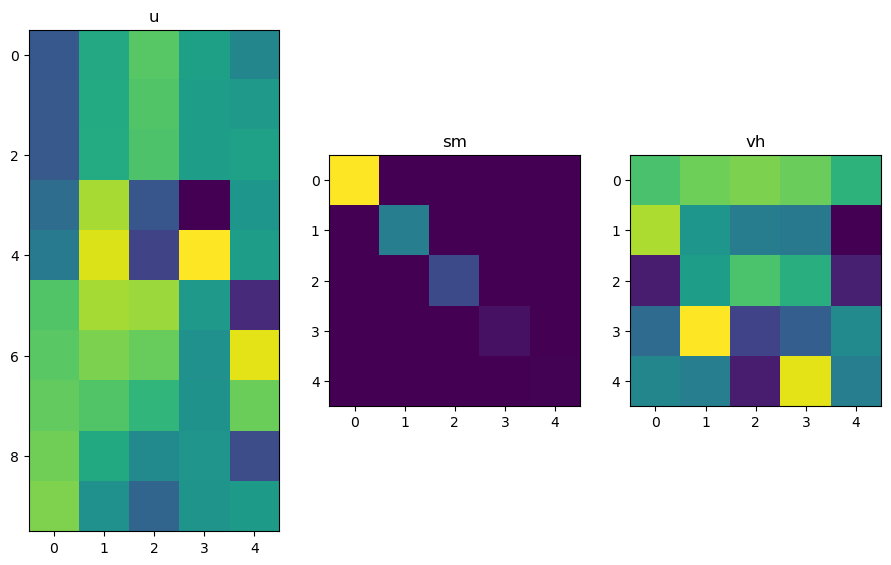

In [148]:
fig,ax=plt.subplots(1,3,figsize=(11,8))
ax[0].imshow(u)
ax[0].set_title('u')
ax[1].imshow(sm)
ax[1].set_title('sm')
ax[2].imshow(vh)
ax[2].set_title('vh')

I'm going to select a 'p' threshold of 4, because the last value is < 0.1 so is not representative. 

In [149]:
sm
p=4
print(sm[0:p, 0:p])
sp=(sm[0:p, 0:p])

[[2.7897326  0.         0.         0.        ]
 [0.         1.19519498 0.         0.        ]
 [0.         0.         0.62683346 0.        ]
 [0.         0.         0.         0.1267487 ]]


In [150]:
up=np.transpose(u[:,0:p])
sp=np.linalg.inv(sm[0:p,0:p])
vp=np.transpose(vh[0:p,:])

In [151]:
print(np.shape(vp))
print(np.shape(sp))
print(np.shape(up))

(5, 4)
(4, 4)
(4, 10)


Text(0.5, 1.0, 'up')

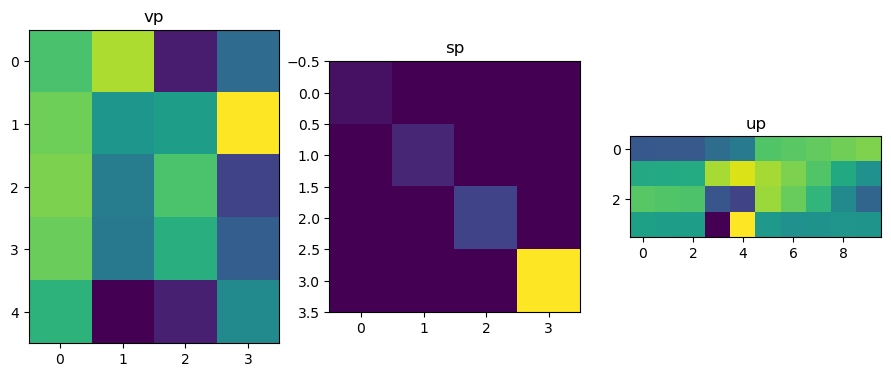

In [152]:
fig,ax=plt.subplots(1,3,figsize=(11,8))
ax[0].imshow(vp)
ax[0].set_title('vp')
ax[1].imshow(sp)
ax[1].set_title('sp')
ax[2].imshow(up)
ax[2].set_title('up')

In [153]:
# Here is the calculation to get the Generalized inverse Gg using SVD, with a threshold of 4
Gg = vp*sp*up
print(np.shape(G))
print(np.shape(Gg))

(10, 5)
(5, 10)


Text(0.5, 1.0, 'Gg.T')

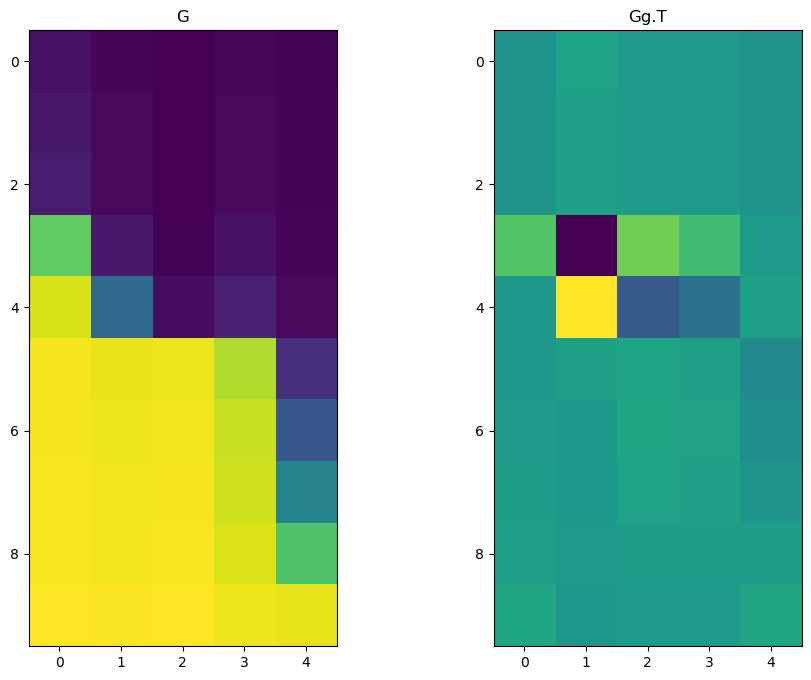

In [154]:
fig,ax=plt.subplots(1,2,figsize=(11,8))
ax[0].imshow(G)
ax[0].set_title('G')
ax[1].imshow(Gg.T)
ax[1].set_title('Gg.T')

(f) [1	pt]	Estimate	the	optimal	model	parameters	mest. (display	values;	specify	units)

In [155]:
m=Gg*(d.T+fit.T)

In [156]:
np.shape(m)

(5, 1)

In [157]:
print("Data mm/yr") 
print(d)

print("Uncertainty(mm/yr")
fit=np.array([1.5905, 0.8008, 1.1438, 2.6112, 0.8839, 0.7195, 2.0715, 1.358, 1.0329, 0.8648])
print(fit)

print("Model Parameters mm/yr") 
print(m.T)

Data mm/yr
[[-26.8789 -27.1257 -27.4999 -14.907   -5.9737  18.3194  19.0408  21.6918
   25.0392  28.7211]]
Uncertainty(mm/yr
[1.5905 0.8008 1.1438 2.6112 0.8839 0.7195 2.0715 1.358  1.0329 0.8648]
Model Parameters mm/yr
[[20.22065393 10.53061472  9.7624925   9.50078862  8.49204332]]


(g) [1	pt]	Estimate	the	model	covariance	matrix. (display	values;	specify	units)

(10, 10)


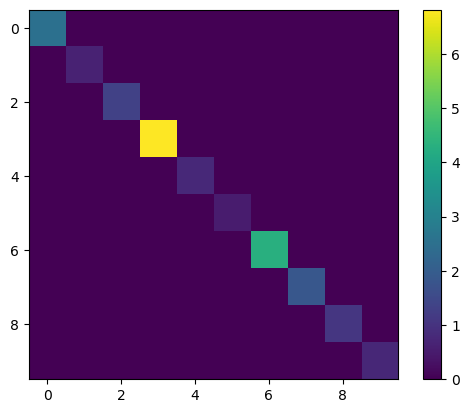

In [158]:

#Normally Distributed Data
# Data covariance matrix
# Uncertainty(mm/yr)
fit=np.array([1.5905, 0.8008, 1.1438, 2.6112, 0.8839, 0.7195, 2.0715, 1.358, 1.0329, 0.8648])

COVd = np.matrix([[np.square(fit[0]),0,0,0,0,0,0,0,0,0],
                [0,np.square(fit[1]),0,0,0,0,0,0,0,0],
                [0,0,np.square(fit[2]),0,0,0,0,0,0,0],
                [0,0,0,np.square(fit[3]),0,0,0,0,0,0],
                [0,0,0,0,np.square(fit[4]),0,0,0,0,0],
                [0,0,0,0,0,np.square(fit[5]),0,0,0,0],
                [0,0,0,0,0,0,np.square(fit[6]),0,0,0],
                [0,0,0,0,0,0,0,np.square(fit[7]),0,0],
                [0,0,0,0,0,0,0,0,np.square(fit[8]),0],
                [0,0,0,0,0,0,0,0,0,np.square(fit[9])]])
print(np.shape(COVd))
plt.imshow(COVd)
plt.colorbar()

(5, 5)


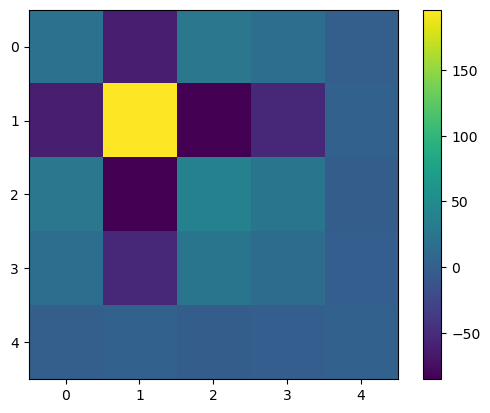

In [159]:
COVm = Gg*COVd*Gg.T
print(np.shape(COVm))
plt.imshow(COVm)
plt.colorbar()

(h) [1	pt]	Report	the	estimated	slip	rate	and	uncertainty	for	all	the	faults	(make	a	table).

In [163]:
#print(mV)
print(m)
print(COVm)

[[20.22065393]
 [10.53061472]
 [ 9.7624925 ]
 [ 9.50078862]
 [ 8.49204332]]
[[ 2.08367810e+01 -6.16460797e+01  2.60170331e+01  1.60155139e+01
   8.84144917e-02]
 [-6.16460797e+01  1.95966124e+02 -8.53066784e+01 -5.26904068e+01
   2.04342742e+00]
 [ 2.60170331e+01 -8.53066784e+01  3.81547858e+01  2.36285754e+01
  -2.08100085e+00]
 [ 1.60155139e+01 -5.26904068e+01  2.36285754e+01  1.46412793e+01
  -1.29562304e+00]
 [ 8.84144917e-02  2.04342742e+00 -2.08100085e+00 -1.29562304e+00
   2.24290203e+00]]


(i) [1	pt] Calculate	the	data	resolution	matrix	Rdata.		(Show	the	full	matrix)

In [164]:
type(u)

numpy.ndarray

(10, 10)


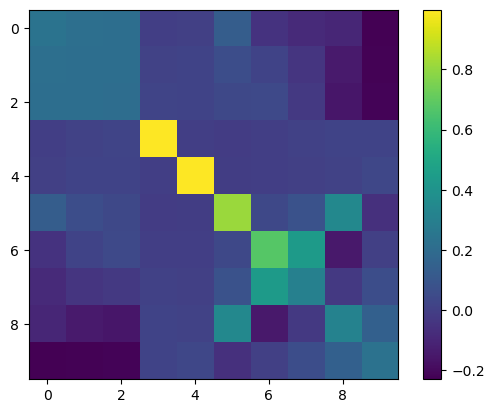

In [165]:
S = np.dot(u,u.T)
print(np.shape(S))
figS=plt.imshow(S)
plt.colorbar()

(j) [1	pt]	Calculate	the	model	resolution	matrix	Rmodel.		(Show	the	full	matrix)

(5, 5)


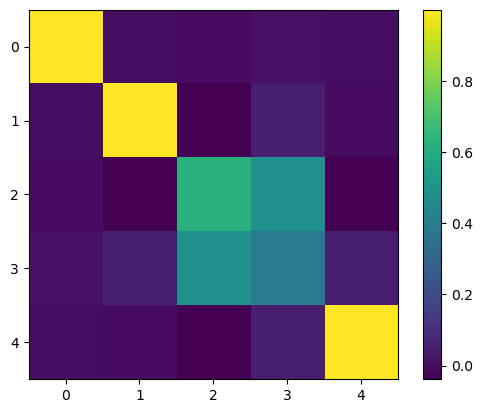

In [166]:
R=np.dot(vp,vp.T)
print(np.shape(R))
figS=plt.imshow(R)
plt.colorbar()


Text(0.5, 1.0, 'R')

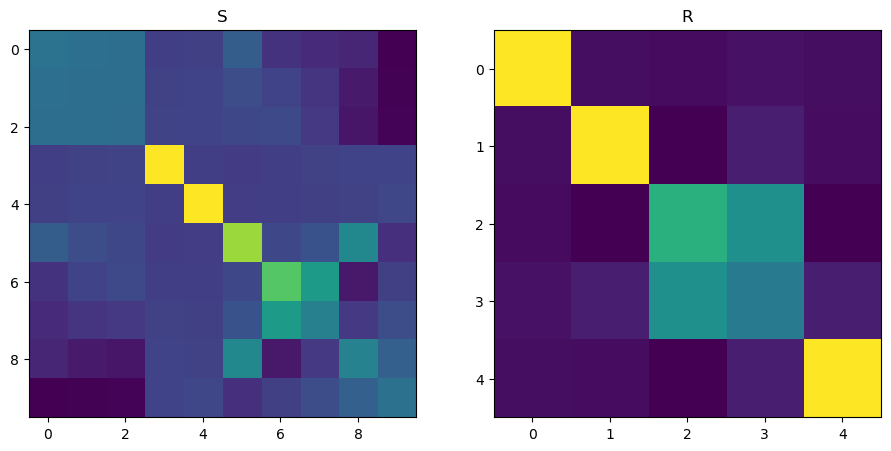

In [167]:
fig,ax=plt.subplots(1,2,figsize=(11,8))
ax[0].imshow(S)
ax[0].set_title('S')
ax[1].imshow(R)
ax[1].set_title('R')

(k) [1	pt]	Which	predicted	data (GNSS	stations)	are best	resolved?		

In [168]:
print("the elements located i the position 3,4,5, of the matrix S") 
print(S[3,3])
print(S[4,4])
print(S[5,5])

the elements located i the position 3,4,5, of the matrix S
0.9985426301679063
0.9982448420756607
0.812788925161322


Which	predicted	
data are least	resolved?

In [169]:
print("the elements located i the position 0,1,2, of the matrix S") 
print(R[0,0])
print(R[1,1])
print(R[2,2])

the elements located i the position 0,1,2, of the matrix S
0.9998203403921214
0.9963197991033216
0.621639276105068


(l) [1	pt]	Which	estimated	model	parameter	is	best	resolved?	

In [170]:
print("the elements located i the position 1,4,5, of the matrix R") 
print(R[1,1])
print(R[2,2])
print(R[4,4])

the elements located i the position 1,4,5, of the matrix R
0.9963197991033216
0.621639276105068
0.99611746525892


Which	estimated	model	parameter	is	least	resolved?

In [171]:
print("the elements located i the position 3,4,5, of the matrix R") 
print(R[3,3])

the elements located i the position 3,4,5, of the matrix R
0.3861031191405679


(m) [1	pt]	Interpretation:		Which	fault	has	the	largest	interseismic	slip	rate?		Which	fault	
has	the	lowest	interseismic	slip	rate?

In [173]:
print("the fault with the largest slip rate is the first one") 
print(m)


the fault with the largest slip rate is the first one
[[20.22065393]
 [10.53061472]
 [ 9.7624925 ]
 [ 9.50078862]
 [ 8.49204332]]


(n) [2	pts]	Interpretation:		Where	would	you	place	an	additional	GNSS	station	to	
improve	the	resolution	of	the	fault	slip	rate?		Justify	your	answer	by	calculating	a	
new	Rmodel.

In [178]:
print('I would add a station in the position -10 at the beginin of the array to add more constrains to the model in the first block')
Mest = R*m
Dpred = S*d.T
print(Mest)
print(Dpred)


I would add a station in the position -10 at the beginin of the array to add more constrains to the model in the first block
[[20.22065393]
 [10.53061472]
 [ 9.7624925 ]
 [ 9.50078862]
 [ 8.49204332]]
[[-27.5524356 ]
 [-27.16259903]
 [-26.96350927]
 [-14.92053322]
 [ -5.97118953]
 [ 18.21191036]
 [ 19.18655574]
 [ 21.49168767]
 [ 25.45586467]
 [ 28.28164384]]


In [177]:
msi=Gg*(d+fit).T
print(msi)

[[20.22065393]
 [10.53061472]
 [ 9.7624925 ]
 [ 9.50078862]
 [ 8.49204332]]
